# Grid Search for different SVM classification algorithm
#### Name: YAGIZ SEZERSAN


#### a. Load the python library and read the data

In [450]:
# Necessary libraries for Lab3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [451]:
# Import csv file
df = pd.read_csv('salary.csv')

# Display the first few rows of dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [452]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53726 entries, 0 to 53725
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             51108 non-null  float64
 1   workclass       48200 non-null  object 
 2   fnlwgt          51082 non-null  float64
 3   education       51126 non-null  object 
 4   education-num   51090 non-null  float64
 5   marital-status  51116 non-null  object 
 6   occupation      48173 non-null  object 
 7   relationship    51102 non-null  object 
 8   race            51117 non-null  object 
 9   sex             51148 non-null  object 
 10  capital-gain    51083 non-null  float64
 11  capital-loss    51095 non-null  float64
 12  hours-per-week  51234 non-null  float64
 13  native-country  50250 non-null  object 
 14  salary          51114 non-null  object 
dtypes: float64(6), object(9)
memory usage: 6.1+ MB


In [453]:
# Summary the datatypes
print(df.dtypes)

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
salary             object
dtype: object


In [454]:
# Describe the data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,51108.000000,5.108200e+04,51090.000000,51083.000000,51095.000000,51234.000000
mean,38.635400,1.897206e+05,10.080251,1076.979837,87.289520,40.422532
std,13.701936,1.056572e+05,2.573057,7436.205892,402.337309,12.384534
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### b. Drop the unneeded data

In [455]:
# First we need to see how many null values we have as per column
df.isnull().sum()

age               2618
workclass         5526
fnlwgt            2644
education         2600
education-num     2636
marital-status    2610
occupation        5553
relationship      2624
race              2609
sex               2578
capital-gain      2643
capital-loss      2631
hours-per-week    2492
native-country    3476
salary            2612
dtype: int64

In [456]:
# Drop if there is any null
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [457]:
df.info()
#below code proves that there are no any null values anymore
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   fnlwgt          45222 non-null  float64
 3   education       45222 non-null  object 
 4   education-num   45222 non-null  float64
 5   marital-status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital-gain    45222 non-null  float64
 11  capital-loss    45222 non-null  float64
 12  hours-per-week  45222 non-null  float64
 13  native-country  45222 non-null  object 
 14  salary          45222 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.5+ MB


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#### C. Create a new column

<Axes: >

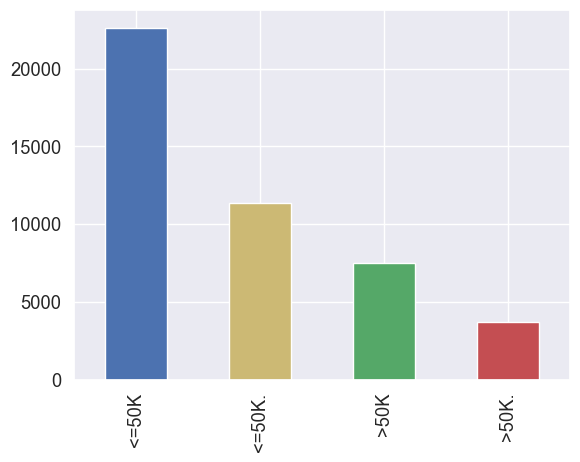

In [458]:
# Check unique values for salary columns
df.salary.value_counts().plot(kind='bar', color=list('bygr'))

In [459]:
# Seems there is duplicate values with ending dot(.)
# Normally there should be only two values as less than 50 or more than it
# First dot(.) indication should be deleted
df.salary = df.salary.str.replace(".","",regex=False)

In [460]:
# Now there are only two values
print(df.salary.nunique())
df.salary.value_counts()

2


<=50K    34014
>50K     11208
Name: salary, dtype: int64

In [461]:
# Use Label Encoder to transfrom salary columns as 0 and 1 for classification
df = df.sample(random_state=1, frac=1).reset_index(drop=True)
gle = LabelEncoder()
gen_label = gle.fit_transform(df.salary)
gen_mapping = {index: label for index, label in enumerate(gle.classes_)}

# Create the 'salary_less50K' column as yes or no
#df['salary_less50K'] = gen_label
df['salary_less50K'] = ['yes' if label == 0 else 'no' for label in gen_label]

In [462]:
# To confirm if encoding is done
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,salary_less50K
0,52.0,Private,187938.0,Some-college,10.0,Divorced,Sales,Not-in-family,White,Female,0.0,0.0,49.0,United-States,<=50K,yes
1,43.0,Private,169628.0,Bachelors,13.0,Never-married,Sales,Unmarried,Black,Female,0.0,0.0,35.0,United-States,>50K,no
2,43.0,Self-emp-not-inc,89636.0,Bachelors,13.0,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0.0,0.0,60.0,South,<=50K,yes
3,32.0,Private,123291.0,12th,8.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K,yes
4,32.0,Private,51150.0,12th,8.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K,yes


In [463]:
# Drop previous parameter
df.drop(['salary'], axis = 1 , inplace = True)

#### d. Modify column name and categorical content

In [464]:
# Update hypen as underscore for columns
df.rename(columns=lambda x: x.replace("-", "_"), inplace=True)

# To confirm if rename is done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   fnlwgt          45222 non-null  float64
 3   education       45222 non-null  object 
 4   education_num   45222 non-null  float64
 5   marital_status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital_gain    45222 non-null  float64
 11  capital_loss    45222 non-null  float64
 12  hours_per_week  45222 non-null  float64
 13  native_country  45222 non-null  object 
 14  salary_less50K  45222 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.2+ MB


In [465]:
# Apply lambda function for object columns
# Update hypen as underscore for categorical columns and use applymap() changes on each element of DataFrame
df.update(df.select_dtypes(include=object).applymap(lambda x: x.replace('-', '_')))

# To confirm if rename is done
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_less50K
0,52.0,Private,187938.0,Some_college,10.0,Divorced,Sales,Not_in_family,White,Female,0.0,0.0,49.0,United_States,yes
1,43.0,Private,169628.0,Bachelors,13.0,Never_married,Sales,Unmarried,Black,Female,0.0,0.0,35.0,United_States,no
2,43.0,Self_emp_not_inc,89636.0,Bachelors,13.0,Married_civ_spouse,Sales,Wife,Asian_Pac_Islander,Female,0.0,0.0,60.0,South,yes
3,32.0,Private,123291.0,12th,8.0,Married_civ_spouse,Machine_op_inspct,Husband,White,Male,0.0,0.0,40.0,United_States,yes
4,32.0,Private,51150.0,12th,8.0,Married_civ_spouse,Other_service,Wife,White,Female,0.0,0.0,40.0,United_States,yes


#### e. Reduce the number of unique values

In [466]:
# Check unique values for object columns
df.select_dtypes(include=object).apply(pd.Series.nunique)

workclass          7
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
salary_less50K     2
dtype: int64

In [467]:
# Check unique values for native_country columns
df.native_country.value_counts()

United_States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto_Rico                     175
Canada                          163
India                           147
El_Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican_Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [468]:
# Seems there are too much unique values for native country
# Replace values as other country except USA
df.loc[df['native_country'] != 'United_States', 'native_country'] = 'Other_Country'

# Now there are only two values
print(df.native_country.nunique())
df.native_country.value_counts()

2


United_States    41292
Other_Country     3930
Name: native_country, dtype: int64

#### f. Drop columns

In [469]:
# capital_gain and loss will be dropped since many data are zero
print('capital_gain')
print(df.capital_gain.value_counts())
print('capital_loss')
print(df.capital_loss.value_counts())

capital_gain
0.0        41432
15024.0      498
7688.0       391
7298.0       351
99999.0      229
           ...  
7262.0         1
22040.0        1
1639.0         1
1731.0         1
2387.0         1
Name: capital_gain, Length: 121, dtype: int64
capital_loss
0.0       43082
1902.0      294
1977.0      246
1887.0      228
2415.0       68
          ...  
1421.0        1
2080.0        1
1911.0        1
419.0         1
2163.0        1
Name: capital_loss, Length: 97, dtype: int64


In [470]:
# Drop step
df.drop(['capital_gain','capital_loss'], axis = 1 , inplace = True)

#### g. Create dummy values for the dataframe

In [471]:
# Check unique values for object columns
df.select_dtypes(include=object).apply(pd.Series.nunique)

workclass          7
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country     2
salary_less50K     2
dtype: int64

In [472]:
# Assign columns that you want to create dummy variables for object dtypes
dummy_columns = ['workclass', 'education', 'marital_status','occupation','relationship',
                 'race','sex','native_country','salary_less50K']
dummy_features  = pd.get_dummies(df[dummy_columns], drop_first=True)

In [473]:
# Drop previous columns
df.drop(df[dummy_columns],axis=1,inplace=True)

In [474]:
# Combine original dataset with dummy one
df2 = pd.concat([df, dummy_features], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   45222 non-null  float64
 1   fnlwgt                                45222 non-null  float64
 2   education_num                         45222 non-null  float64
 3   hours_per_week                        45222 non-null  float64
 4   workclass_Local_gov                   45222 non-null  uint8  
 5   workclass_Private                     45222 non-null  uint8  
 6   workclass_Self_emp_inc                45222 non-null  uint8  
 7   workclass_Self_emp_not_inc            45222 non-null  uint8  
 8   workclass_State_gov                   45222 non-null  uint8  
 9   workclass_Without_pay                 45222 non-null  uint8  
 10  education_11th                        45222 non-null  uint8  
 11  education_12th 

In [475]:
# Rename salary for clear explanation of header
df2.rename(columns={'salary_less50K_yes':'salary_less50K'}, inplace=True)

In [476]:
# Reset the index and ensure that the previous index has been not kept
df2.reset_index(drop=True, inplace=True)

# Save updated dataset and indicate index as False since we do not want to include index columns
df2.to_csv('cleaned.csv', index=False)

#### h. Create a grid search with cross validation (GridSearchCV) of SVM classifier with the following options/settings:

In [477]:
# Apply test and train dataset
target = df2.salary_less50K
features = df2.drop('salary_less50K', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,train_size=0.05)

# First I apply Scaler for all dataset in Pipeline for next code cells 
# However, since most of columns are already transformed as 0 or 1, it does not make sense to scale them again
# Thus, I chose to scale only for numerical that we did not create dummy values 
ss = StandardScaler()
X_train[["age","fnlwgt","education_num","hours_per_week"]] = ss.fit_transform(X_train[["age","fnlwgt","education_num","hours_per_week"]])
X_test[["age","fnlwgt","education_num","hours_per_week"]] = ss.transform(X_test[["age","fnlwgt","education_num","hours_per_week"]])

In [478]:
# GridSearchCV via using pipeline to apply estimator and SVC
pipeline = Pipeline([
    #('scaler', StandardScaler()), 
    ('feature_selection', SelectFromModel(estimator=LogisticRegression())), 
    ('svm', SVC(random_state=42))
])

# Define parameters for grid search
grid_parameters = {
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [1, 0.1, 0.01],
    'svm__C': [1, 10, 50]
}

# Perform grid search via cross-validation
grid_search = GridSearchCV(pipeline, grid_parameters, cv=3,n_jobs =-1,scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model performance
print("\nBest parameters :", grid_search.best_params_)
print("Best model accuracy:", grid_search.best_score_)


Best parameters : {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best model accuracy: 0.833707903429019


#### i.  Provide the confusion matrix, classification report and analyze the precision/recall for the best model

Confusion Matrix:
[[1054 1129]
 [ 446 6416]]

Confusion Matrix HeatMap:


<Axes: xlabel='Predicted', ylabel='Actual'>

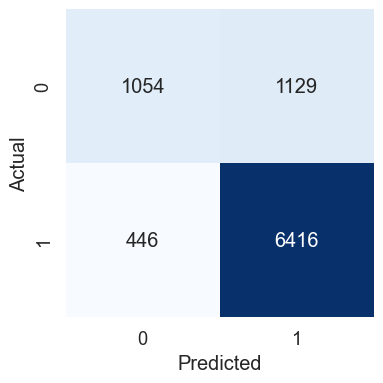

In [479]:
# Get best model
best_model = grid_search.best_estimator_

# Predictions on the test data
y_pred = best_model.predict(X_test)

# Confusion matrix and classification report
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nConfusion Matrix HeatMap:")
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, cbar=False, square=True, cmap="Blues",vmax = 6000,fmt="d")

In [480]:
# Classification report and precision/recall
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57      2183
           1       0.85      0.94      0.89      6862

    accuracy                           0.83      9045
   macro avg       0.78      0.71      0.73      9045
weighted avg       0.81      0.83      0.81      9045



* It is obvious that the best model demonstrates improved precision for both classes. The precision of 0.70 for Class 0 indicates a satisfactory level of accuracy in predicting samples belonging to this class. On the other hand, the precision of 0.85 for Class 1 signifies a high level of accuracy in predicting samples from this class.

* For recall, the model performs relatively better for Class 1 as of 0.94. This indicates that a significant portion of actual samples belonging to Class 1 are correctly identified by the model. However, recall for Class 0 is lower at 0.48 so it needs for improvement in accurately identifying samples from this class.